# Plotting with Seaborn

The previous notebooks gave us some experience manipulating data. In this last notebook we will have a play with Seaborn, and produce some prettier plots.

In this tutorial, you get the answers given to you, and are invited to play around with the methods on your own at the end :-)

Seaborn has a two-part tutorial on [aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) and [colour paletettes](https://seaborn.pydata.org/tutorial/color_palettes.html) that can change the style of the plots.  Here's one of their boilerplate examples:

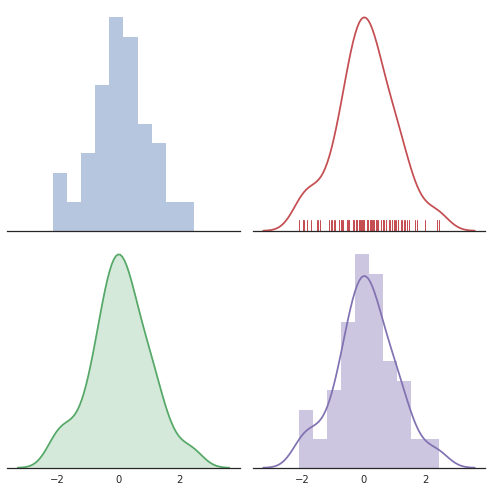

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Style options available out of the box: darkgrid, whitegrid, dark, white, and ticks
# Palette options available out of the box: deep, muted, pastel, bright, dark, and colorblind.
sns.set(style="white", palette="deep", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

Here's another example using random data:

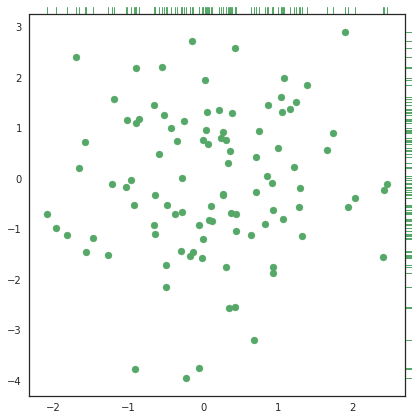

In [2]:
# Generate a random bivariate dataset
rs = np.random.RandomState(9)
mean = [0, 0]
cov = [(1, 0), (0, 2)]
x, y = rs.multivariate_normal(mean, cov, 100).T

# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

Let's see what we can learn by plotting some of the data in the inflammation data set.

First, a little exercise to give us some "arbitrary" labels for the columns.

In [57]:
import pandas as pd
import string
alph=list(string.ascii_lowercase)
alphalph=[]
for x in alph:
    for y in alph:
        alphalph.append(x+y)
spread=alph+alphalph

Now we can import the "inflammation" data into several pandas dataframes.  Note the way the special tweaks to the way the data is imported, since the CSV files didn't have any labels in them.

In [182]:
df = pd.DataFrame()
df1 = pd.read_csv('inflammation-01.csv',delimiter=',',
                   header=None,names=spread[0:39],index_col=False)
df2 = pd.read_csv('inflammation-02.csv',delimiter=','
                  ,header=None,names=spread[0:39],index_col=False)
df3 = pd.read_csv('inflammation-03.csv',delimiter=','
                  ,header=None,names=spread[0:39],index_col=False)
df4 = pd.read_csv('inflammation-04.csv',delimiter=','
                  ,header=None,names=spread[0:39],index_col=False)
df5 = pd.read_csv('inflammation-04.csv',delimiter=','
                  ,header=None,names=spread[0:39],index_col=False)

Here's one one of them looks like, no surprises here I hope -- but you can see that we now have some reasonably useful labels, numbers down the left and letters across the top.

In [133]:
df2

,a,b,c,d,e,f,g,h,i,j,...,ad,ae,af,ag,ah,ai,aj,ak,al,am
0,0,0,0,1,3,4,6,5,2,7,...,8,6,6,6,6,5,4,2,1,1
1,0,0,2,2,4,2,1,7,5,7,...,8,3,5,7,7,3,2,2,0,2
2,0,1,2,3,2,1,4,1,8,7,...,4,7,2,5,6,4,5,4,0,2
3,0,0,0,0,1,2,4,7,3,5,...,9,2,3,2,3,5,3,1,3,1
4,0,1,0,2,1,2,3,6,5,2,...,2,9,9,8,5,3,5,3,0,2
5,0,0,1,3,4,4,2,2,6,3,...,6,9,6,4,5,1,4,1,0,0
6,0,1,0,3,2,3,2,2,4,6,...,10,6,9,4,3,3,3,1,3,1
7,0,1,2,1,4,1,2,7,2,2,...,2,4,5,8,3,5,3,3,0,0
8,0,0,1,2,2,1,4,2,7,4,...,10,6,3,2,1,5,3,4,3,2
9,0,1,1,1,4,2,1,3,5,3,...,4,10,9,3,3,6,3,2,0,2


Let's plot some of the rows of this data frame to get an idea of the shape of the data.

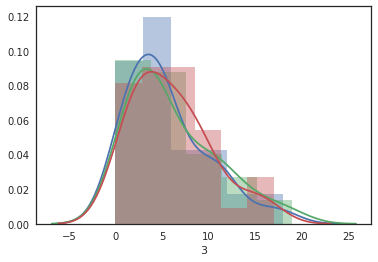

In [76]:
sns.distplot(df1.iloc[1])
sns.distplot(df1.iloc[2])
sns.distplot(df1.iloc[3])

Maybe we can get a better feel for the data by plotting all of it at once.

(60, 39)


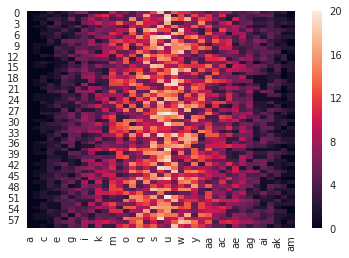

In [84]:
print(df1.shape)
sns.heatmap(df1)

But if we're going for scale, why not plot five of the data sets on one graph?  We can just concatenate the data frames into one big data frame and plot that.  (Note, we're using a different color scheme now.)

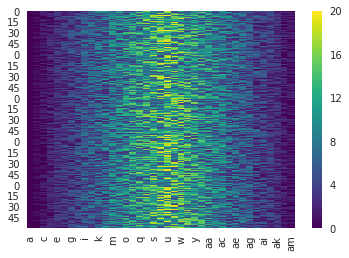

In [183]:
one_and_two_and_three_and_four_and_five = pd.concat([df1,df2,df3,df4,df5])
sns.heatmap(one_and_two_and_three_and_four_and_five,cmap='viridis')

This is a tricky way to compute the "average" across all of the dataframes -- using a Panel, which is a higher dimensional data structure (specifically, 3 dimensions as opposed to the 2 dimensions of a data frame).

Note: in future versions of pandas, you're supposed to use something called [xarray](http://xarray.pydata.org/en/stable/pandas.html#panel-transition), but this still works for now.

Note that the result that we compute, `p.mean(axis=0)`, is itself another dataframe.

In [208]:
p = pd.Panel({n: df for n, df in enumerate([df1, df2, df3,df4,df5])})
p.mean(axis=0)

,a,b,c,d,e,f,g,h,i,j,...,ad,ae,af,ag,ah,ai,aj,ak,al,am
0,0.0,0.6,1.0,2.2,3.0,3.6,3.2,5.8,4.0,4.6,...,5.4,6.8,6.0,6.0,5.0,3.8,2.6,1.6,1.0,1.0
1,0.0,0.6,1.2,1.4,2.2,1.2,3.2,2.8,3.6,6.6,...,7.6,3.6,5.0,6.4,3.8,5.0,2.4,2.2,0.2,0.8
2,0.0,0.6,1.4,2.4,3.4,1.8,3.6,2.4,5.8,8.0,...,4.0,5.6,6.6,5.0,3.2,3.8,3.0,3.6,1.6,1.4
3,0.0,0.0,1.6,0.6,2.0,2.2,3.0,2.2,5.4,6.2,...,6.6,4.2,5.4,6.4,4.6,3.6,2.8,1.6,2.6,1.8
4,0.0,0.8,1.4,2.8,2.6,1.8,3.0,4.8,4.2,4.0,...,3.4,7.8,7.4,4.6,2.8,1.8,4.4,1.8,0.8,0.6
5,0.0,0.4,0.8,1.0,2.8,3.4,2.2,3.0,5.4,5.8,...,5.2,5.8,6.0,6.4,3.8,4.8,3.4,2.0,2.0,1.2
6,0.0,0.4,0.6,2.2,3.6,3.8,2.0,2.8,4.4,5.4,...,6.2,6.2,6.6,4.8,4.2,4.8,4.0,1.6,1.8,0.4
7,0.0,0.4,1.2,1.8,2.6,1.6,2.2,3.8,3.4,4.0,...,4.4,5.2,6.8,4.4,3.4,3.8,3.8,2.4,0.8,1.2
8,0.0,0.0,0.6,2.6,1.6,3.8,5.0,4.2,5.6,4.8,...,8.6,5.6,6.0,5.6,3.0,4.0,3.2,2.8,1.2,0.4
9,0.0,1.0,0.4,2.4,2.8,3.4,2.4,5.2,5.6,6.6,...,6.8,5.6,4.6,3.6,5.6,4.6,3.6,1.8,1.2,1.0


Now that we've computed the "average" from across the different data frames, let's find out which of our dataframes is closest to this average.  Here, we do three tricky things at once: arithmetic on data frames, followed by "mapping" an a function over the whole dataframe.  The function is "anonymous" because it is written down in lambda notation.  Actually, we could have just used the non-anonymous `abs` function, but I wanted to introduce lambdas to you.  You can use them to do some powerful things -- read more about them here: https://www.python-course.eu/lambda.php

In [186]:
df1_abs=(df1-p.mean(axis=0)).applymap(lambda x: abs(x))
df2_abs=(df2-p.mean(axis=0)).applymap(lambda x: abs(x))
df3_abs=(df3-p.mean(axis=0)).applymap(lambda x: abs(x))
df4_abs=(df4-p.mean(axis=0)).applymap(lambda x: abs(x))
df5_abs=(df5-p.mean(axis=0)).applymap(lambda x: abs(x))

Now that we've found how close all of the data points are to the "average" we can ask which datapoints in `df1` are **closer** to average than all of the corresponding data points in all of the other data frames.  We do this by pairwise comparison (to produce dataframes containing zero/one values) and then by considering the logical "and", element-wise, across all of this boolean data.  Finally, we plot a heatmap showing where we can find `df1`'s "most-typical" data points.

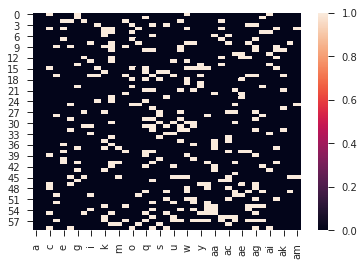

In [209]:
one_vs_two = df1_abs<df2_abs
one_vs_three = df1_abs<df3_abs
one_vs_four = df1_abs<df4_abs
one_vs_five = df1_abs<df5_abs
one_closest_to_average=one_vs_two&one_vs_three&one_vs_four&one_vs_five
sns.heatmap(one_closest_to_average)


Which one of these rows is most typical (i.e, which one has the most ones in it?)?

In [199]:
one_closest_to_average.sum(axis=1).idxmax()

57

What does this most-typical row actually look like?

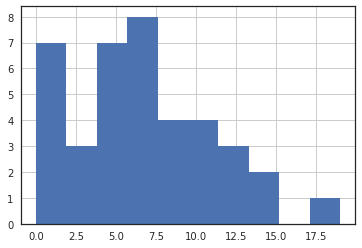

In [206]:
df1.ix[57].hist()

Interesting, let's compare it with the initial sample that we tried earlier on.  We average the initial sample to reduce the amount of noise.  Even so, we can see by inspection that the initial sample is a bit more noisy -- notice two or three bumps in the blue line that's fitted to the blue data set, when compared with the smooth onset and decrease in the red line.

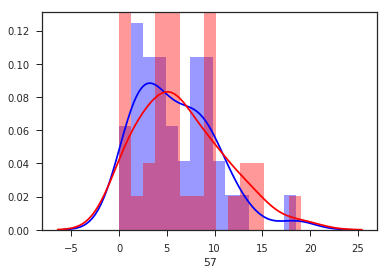

In [218]:
sns.distplot(df1.iloc[1:3].mean(axis=0),color="blue",bins=15)
sns.distplot(df1.iloc[57],color="red",bins=15)

You can also load some pre-compiled data from the Seaborn website. https://github.com/mwaskom/seaborn-data. You can then obtain list of available datasets using `get_dataset_names`.  Here are a few nice graphs from the Seaborn tutorial.

In [20]:
sns.get_dataset_names()

/usr/local/lib/python3.4/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 170 of the file /usr/lib/python3.4/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'planets',
 'tips',
 'titanic']

In [21]:
tips = sns.load_dataset("tips")

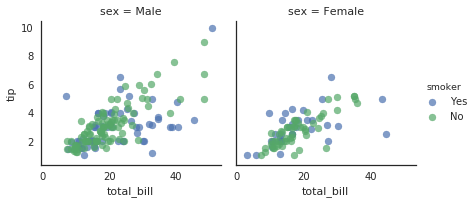

In [22]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

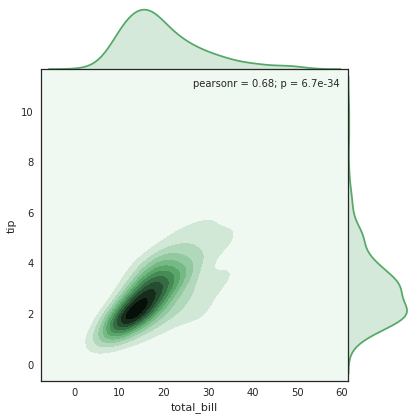

In [37]:
g = sns.jointplot("total_bill", "tip", data=tips,
...                   kind="kde", space=0, color="g")

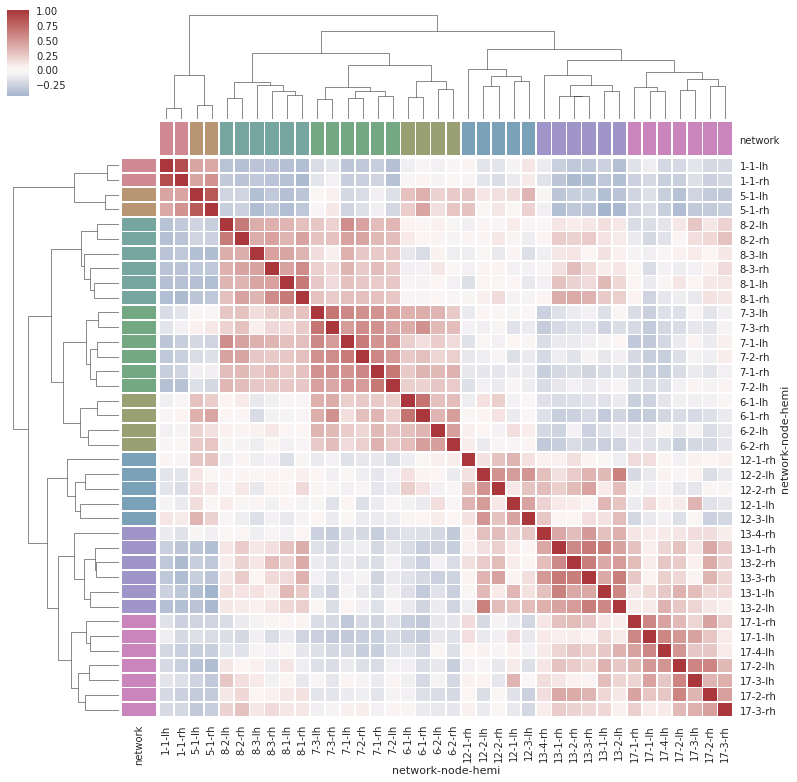

In [40]:
# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))


You've reached the end of the tutorial, but the fun doesn't have to stop here - try making some more plots, or go back over the previous plots and try to understand more about how they're constructed.